In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\pnaik27\Anaconda\Algorithm\Linear Regression\DataSet\car data.csv')

In [3]:
df['Log_Kms_Driven']=np.log10(df['Kms_Driven'])

<AxesSubplot:>

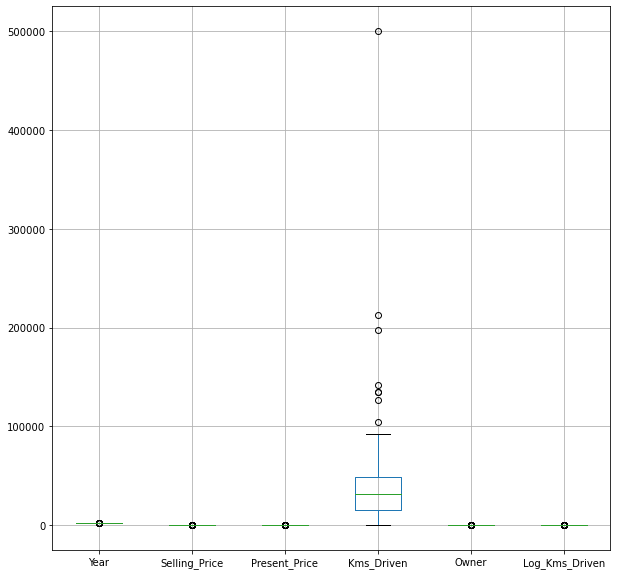

In [4]:
df.boxplot(figsize=(10,10))

In [5]:
df['Log_Kms_Driven']

0      4.431364
1      4.633468
2      3.838849
3      3.716003
4      4.627878
         ...   
296    4.531326
297    4.778151
298    4.944157
299    3.954243
300    3.737511
Name: Log_Kms_Driven, Length: 301, dtype: float64

In [6]:
df['Age']=2020-df['Year']

In [7]:
Final_df=df[['Selling_Price', 'Present_Price','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Log_Kms_Driven','Age']]
Final_df.head(3)

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,Log_Kms_Driven,Age
0,3.35,5.59,Petrol,Dealer,Manual,0,4.431364,6
1,4.75,9.54,Diesel,Dealer,Manual,0,4.633468,7
2,7.25,9.85,Petrol,Dealer,Manual,0,3.838849,3


<AxesSubplot:>

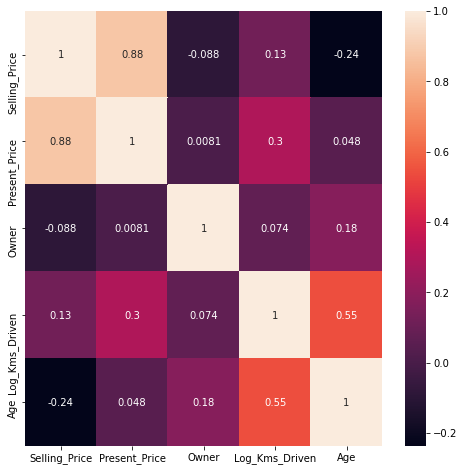

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(Final_df.corr(),annot=True)

In [10]:
Final_df.drop(columns='Owner',inplace=True)

C:\Users\pnaik27\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
Final_df

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Log_Kms_Driven,Age
0,3.35,5.59,Petrol,Dealer,Manual,4.431364,6
1,4.75,9.54,Diesel,Dealer,Manual,4.633468,7
2,7.25,9.85,Petrol,Dealer,Manual,3.838849,3
3,2.85,4.15,Petrol,Dealer,Manual,3.716003,9
4,4.60,6.87,Diesel,Dealer,Manual,4.627878,6
...,...,...,...,...,...,...,...
296,9.50,11.60,Diesel,Dealer,Manual,4.531326,4
297,4.00,5.90,Petrol,Dealer,Manual,4.778151,5
298,3.35,11.00,Petrol,Dealer,Manual,4.944157,11
299,11.50,12.50,Diesel,Dealer,Manual,3.954243,3


In [12]:
Final_df=pd.get_dummies(Final_df,drop_first=True)

In [13]:
scaler=StandardScaler()
var=['Present_Price','Log_Kms_Driven','Age']
Final_df[var]=scaler.fit_transform(Final_df[var])
Final_df.head(3)

,Selling_Price,Present_Price,Log_Kms_Driven,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,-0.236215,0.083911,-0.128897,0,1,0,1
1,4.75,0.221505,0.543824,0.217514,1,0,0,1
2,7.25,0.257427,-1.264426,-1.168129,0,1,0,1


In [14]:
y=Final_df.iloc[:,0]
x=Final_df.iloc[:,1:]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)

In [25]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=reg_model.predict(x_test)

In [26]:
reg_model.score(x_train,y_train)

0.8810572181019537

In [27]:
reg_model.score(x_test,y_test)

0.87062874474105

In [29]:
import statsmodels.api as sm
model_1=sm.OLS(endog=y,exog=x).fit()
print(model_1.summary())

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              572.7
Date:                Wed, 16 Dec 2020   Prob (F-statistic):                   3.31e-167
Time:                        13:17:02   Log-Likelihood:                         -604.21
No. Observations:                 301   AIC:                                      1222.
Df Residuals:                     294   BIC:                                      1248.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.2479425040537857
MSE: 4.334673947694565
RMSE: 2.081987979719039


In [39]:
Final_df_1=df[['Selling_Price', 'Present_Price','Fuel_Type', 'Seller_Type', 'Transmission','Age','Kms_Driven']]

In [40]:
Final_df_1

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Age,Kms_Driven
0,3.35,5.59,Petrol,Dealer,Manual,6,27000
1,4.75,9.54,Diesel,Dealer,Manual,7,43000
2,7.25,9.85,Petrol,Dealer,Manual,3,6900
3,2.85,4.15,Petrol,Dealer,Manual,9,5200
4,4.60,6.87,Diesel,Dealer,Manual,6,42450
...,...,...,...,...,...,...,...
296,9.50,11.60,Diesel,Dealer,Manual,4,33988
297,4.00,5.90,Petrol,Dealer,Manual,5,60000
298,3.35,11.00,Petrol,Dealer,Manual,11,87934
299,11.50,12.50,Diesel,Dealer,Manual,3,9000


In [41]:
Final_df_1=pd.get_dummies(Final_df_1,drop_first=True)

In [42]:
Final_df_1.drop(columns=['Kms_Driven'],inplace=True)

In [43]:
Final_df_1.head()

,Selling_Price,Present_Price,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,6,0,1,0,1
1,4.75,9.54,7,1,0,0,1
2,7.25,9.85,3,0,1,0,1
3,2.85,4.15,9,0,1,0,1
4,4.60,6.87,6,1,0,0,1


In [44]:
scaler=StandardScaler()
var=['Present_Price','Age']
Final_df_1[var]=scaler.fit_transform(Final_df_1[var])
Final_df_1.head(3)

,Selling_Price,Present_Price,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,-0.236215,-0.128897,0,1,0,1
1,4.75,0.221505,0.217514,1,0,0,1
2,7.25,0.257427,-1.168129,0,1,0,1


In [53]:
y1=Final_df_1.iloc[:,0]
x1=Final_df_1.iloc[:,1:]

In [54]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=23)

In [55]:
reg_model_1=LinearRegression()
reg_model_1.fit(x1_train,y1_train)

LinearRegression()

In [56]:
reg_model_1.score(x1_train,y1_train)

0.8806383144186944

In [57]:
reg_model_1.score(x1_test,y1_test)

0.8684783886444389

In [58]:
y1_pred=reg_model_1.predict(x1_test)

In [59]:
import statsmodels.api as sm
model_1=sm.OLS(endog=y1,exog=x1).fit()
print(model_1.summary())

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              664.7
Date:                Wed, 16 Dec 2020   Prob (F-statistic):                   3.94e-168
Time:                        13:33:43   Log-Likelihood:                         -605.40
No. Observations:                 301   AIC:                                      1223.
Df Residuals:                     295   BIC:                                      1245.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

MAE: 1.2677990171375986
MSE: 4.406723125323622
RMSE: 2.099219646755342
